### Dataviz: Black Friday Dataset ###

In [1]:
# import pandas
import pandas as pd

# open the dataset
df = pd.read_csv('./Resources/BlackFriday.csv')

#basic structure information
display(df.info())

#preview the data
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


None

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


### Classificação das Variáveis ####

In [2]:
# classification of the variables
tipo_variaveis = [  ['User_ID', 'Quantitativa Discreta'],
                    ['Product_ID', 'Categórica Nominal'],
                    ['Gender', 'Categórica Nominal'],
                    ['Age', 'Categórica Ordinal'],
                    ['Occupation', 'Categórica Nominal'],
                    ['City_Category', 'Categórica Nominal'],
                    ['Stay_In_Current_City_Years', 'Categórica Ordinal'],
                    ['Marital_Status', 'Categórica Nominal'],
                    ['Product_Category_1', 'Categórica Nominal'],
                    ['Product_Category_2', 'Categórica Nominal'],
                    ['Product_Category_3', 'Categórica Nominal'],
                    ['Purchase', 'Categórica Nominal']]

tipo_variaveis = pd.DataFrame(tipo_variaveis, columns=['Variável', 'Classificação'])

display(tipo_variaveis)

,Variável,Classificação
0,User_ID,Quantitativa Discreta
1,Product_ID,Categórica Nominal
2,Gender,Categórica Nominal
3,Age,Categórica Ordinal
4,Occupation,Categórica Nominal
5,City_Category,Categórica Nominal
6,Stay_In_Current_City_Years,Categórica Ordinal
7,Marital_Status,Categórica Nominal
8,Product_Category_1,Categórica Nominal
9,Product_Category_2,Categórica Nominal


## Tratamento de nulos

In [3]:
# fill of the NaN values with 0 as the columns with NaN is Product_Category_2 and Product_Category_3, and 
# they are numeric, and categoric, so all the NaN values can be represented as 0 to keep the numeric type in all the lines
df.fillna(value=0,inplace=True)

display(df.head(5))

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


### Análise Exploratória: Entendento o dataset

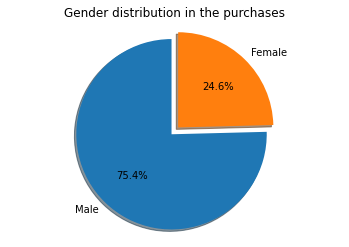

In [4]:
# relationship between variables
import matplotlib.pyplot as plt

# gender distribution in the registers
labels = 'Male', 'Female'
sizes = [df['Gender'][df['Gender'] == 'M'].count(), df['Gender'][df['Gender'] == 'F'].count()]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()

ax1.set_title('Gender distribution in the purchases')

ax1.pie(sizes,
        explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

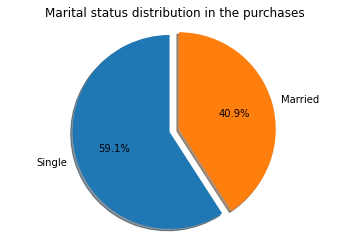

In [5]:
# Marital_Status distribution in the registers
labels = 'Single', 'Married'
sizes = [df['Marital_Status'][df['Marital_Status'] == 0].count(), df['Marital_Status'][df['Marital_Status'] == 1].count()]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()

ax1.set_title('Marital status distribution in the purchases')

ax1.pie(sizes,
        explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

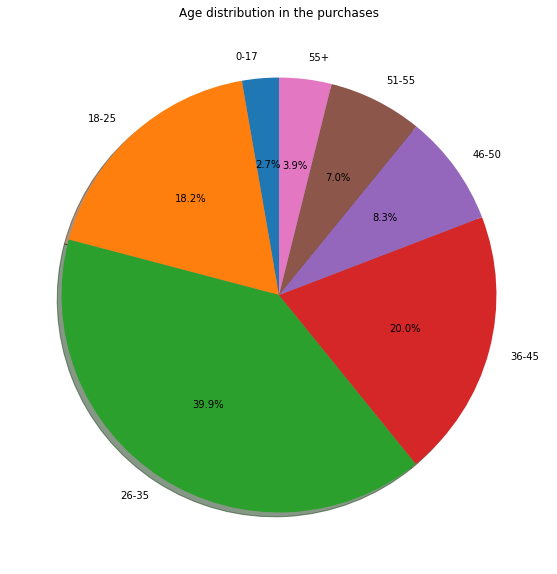

In [6]:
# Age distribution in the registers

a1 = df['Age'].value_counts()

a1 = a1.to_frame().sort_index().reset_index()

labels = a1['index'].astype('str').to_list()
sizes = a1['Age'].to_list()
#explode = (0, 0.1) 

plt.figure(figsize=(10,10))

plt.pie(sizes,
        #explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)

plt.title('Age distribution in the purchases')

plt.show()

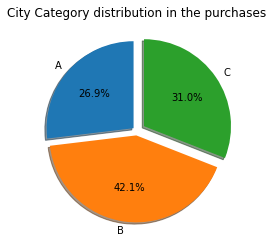

In [7]:
# City_Category distribution in the registers

c1 = df['City_Category'].value_counts()

c1 = c1.to_frame().sort_index().reset_index()

labels = c1['index'].astype('str').to_list()
sizes = c1['City_Category'].to_list()
explode = (0.05, 0.05,0.1) 

#plt.figure(figsize=(10,10))

plt.pie(sizes,
        explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)

plt.title('City Category distribution in the purchases')

plt.show()

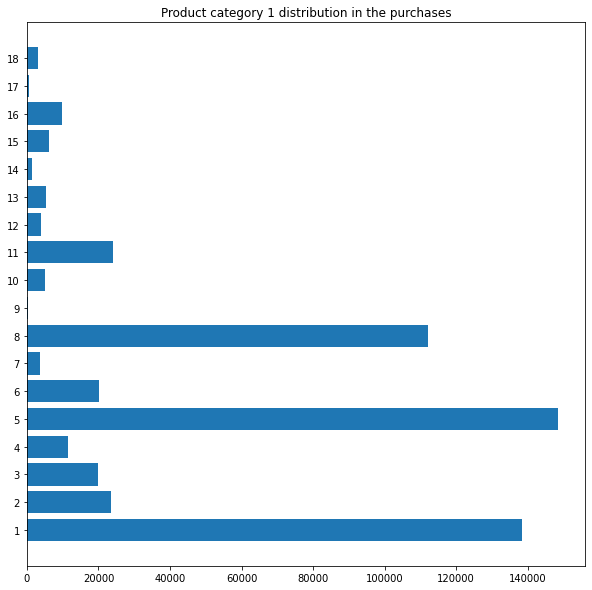

In [8]:
# Product category distribution in the registers

s1 = df['Product_Category_1'].value_counts()

s1 = s1.to_frame().sort_index().reset_index()

# tronsform the product category column type into string so it can be displayed as category in the graphics,
# not like a scalar value
labels = s1['index'].astype('str').to_list()

sizes = s1['Product_Category_1'].to_list()

plt.figure(figsize=(10,10))

plt.barh(labels,sizes)

plt.title('Product category 1 distribution in the purchases')

plt.show()

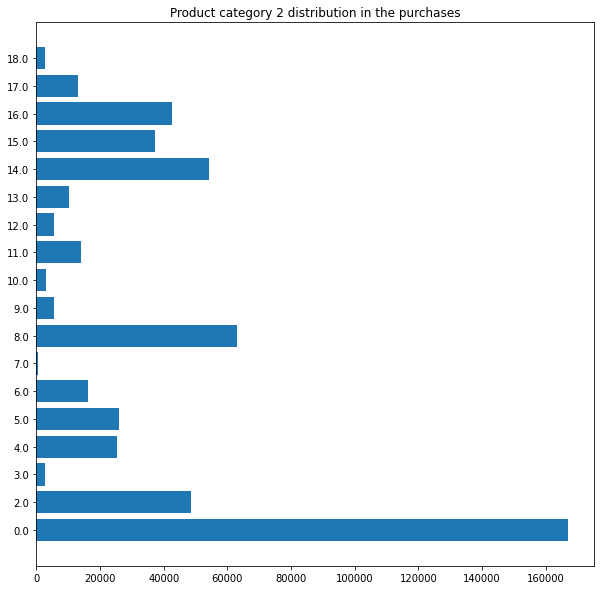

In [9]:
# Product category distribution in the registers

s2 = df['Product_Category_2'].value_counts()

s2 = s2.to_frame().sort_index().reset_index()

# tronsform the product category column type into string so it can be displayed as category in the graphics,
# not like a scalar value
labels = s2['index'].astype('str').to_list()

sizes = s2['Product_Category_2'].to_list()

plt.figure(figsize=(10,10))

plt.barh(labels,sizes)
plt.title('Product category 2 distribution in the purchases')

plt.show()

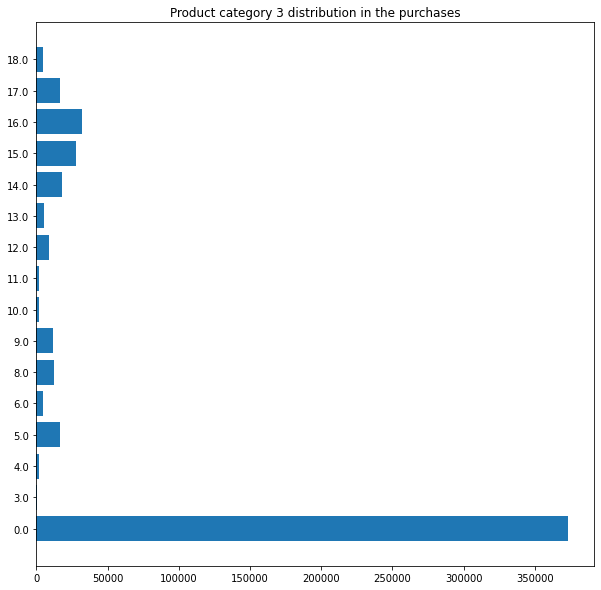

In [10]:
# Product category distribution in the registers

s3 = df['Product_Category_3'].value_counts()

s3 = s3.to_frame().sort_index().reset_index()

# tronsform the product category column type into string so it can be displayed as category in the graphics,
# not like a scalar value
labels = s3['index'].astype('str').to_list()

sizes = s3['Product_Category_3'].to_list()

plt.figure(figsize=(10,10))

plt.title('Product category 3 distribution in the purchases')
plt.barh(labels,sizes)

plt.show()

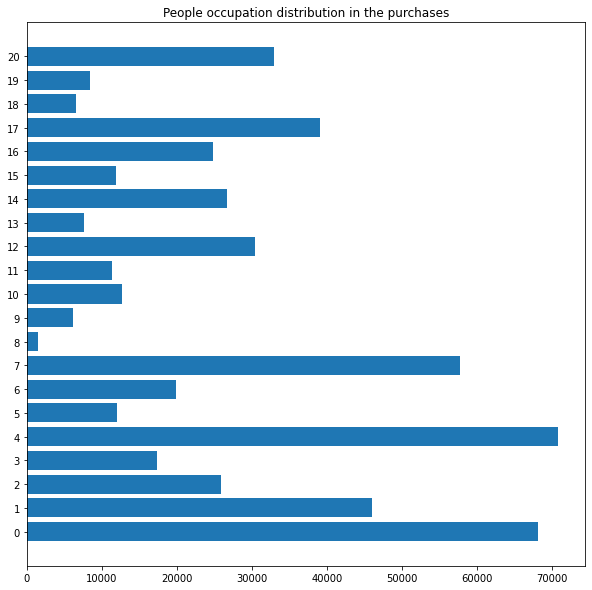

In [11]:
# People occupation distribution in the registers

o1 = df['Occupation'].value_counts()

o1 = o1.to_frame().sort_index().reset_index()

# tronsform the occupation column type into string so it can be displayed as category in the graphics,
# not like a scalar value
labels = o1['index'].astype('str').to_list()

sizes = o1['Occupation'].to_list()

plt.figure(figsize=(10,10))

plt.title('People occupation distribution in the purchases')
plt.barh(labels,sizes)

plt.show()

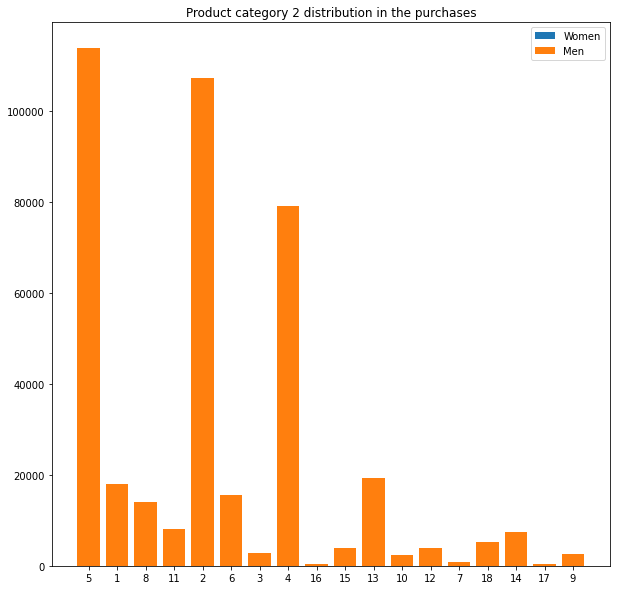

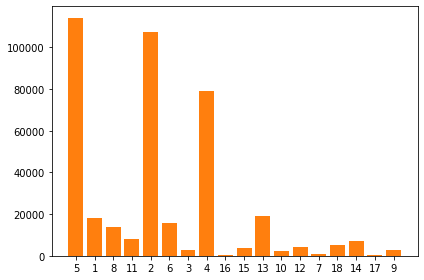

In [63]:

gp = pd.DataFrame(df.groupby(['Gender','Product_Category_1'])['User_ID'].count()).reset_index()

gp[gp['Gender'] == 'F']

g1 = df['Product_Category_1'].value_counts().to_frame().reset_index()
labels = g1['index'].astype('str')

sizeF = gp[gp['Gender'] == 'F']['User_ID'].to_list()
sizeM = gp[gp['Gender'] == 'M']['User_ID'].to_list()

plt.figure(figsize=(10,10))

plt.bar(labels,sizeF,label="Women")
plt.bar(labels,sizeM,label="Men")
plt.legend()

plt.title('Product category 2 distribution in the purchases')

plt.show()

fig, ax = plt.subplots()
rects1 = ax.bar(labels, sizeF, label='Women')
rects2 = ax.bar(labels, sizeM, label='Men')

# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
#ax.set_xticks(x)
#ax.set_xticklabels(labels)
#ax.legend()


'''def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom') '''


#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()